In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [55]:
data_path = '__processed_images_log.csv'
data = pd.read_csv(data_path)

In [56]:
# Calculate descriptive statistics for the numerical columns
descriptive_stats = data[['ita_gt', 'ita_gen', 'ita_error']].describe()

# Calculate the mean absolute error per skin type
mean_error_per_skin_type = data.groupby('skin_type')['ita_error'].mean().sort_values()

# Display the results
descriptive_stats, mean_error_per_skin_type

(           ita_gt     ita_gen   ita_error
 count  702.000000  702.000000  702.000000
 mean    34.596155   39.083318    5.115711
 std      8.160993    6.950440    4.119100
 min     18.736526   13.350590    0.006295
 25%     26.467923   35.936633    2.106810
 50%     37.563859   41.842651    4.185990
 75%     40.999651   44.036212    6.589547
 max     44.025306   48.013563   21.959527,
 skin_type
 Light (II)            2.201401
 Intermediate (III)    4.613923
 Tan (IV)              8.415608
 Name: ita_error, dtype: float64)

In [57]:
# Calculate descriptive statistics for the numerical columns
descriptive_stats = data[['ita_gt', 'ita_gen', 'ita_error']].describe()

# Calculate the mean absolute error per skin type
mean_error_per_skin_type = data.groupby('skin_type')['ita_error'].mean().sort_values()

# Display the results
descriptive_stats, mean_error_per_skin_type

(           ita_gt     ita_gen   ita_error
 count  702.000000  702.000000  702.000000
 mean    34.596155   39.083318    5.115711
 std      8.160993    6.950440    4.119100
 min     18.736526   13.350590    0.006295
 25%     26.467923   35.936633    2.106810
 50%     37.563859   41.842651    4.185990
 75%     40.999651   44.036212    6.589547
 max     44.025306   48.013563   21.959527,
 skin_type
 Light (II)            2.201401
 Intermediate (III)    4.613923
 Tan (IV)              8.415608
 Name: ita_error, dtype: float64)

/tmp/ipykernel_20106/3536634906.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ita_error', y='skin_type', data=data, palette="vlag", order=["Very light (I)", "Light (II)", "Intermediate (III)", "Tan (IV)", "Brown (V)", "Dark (VI)"])


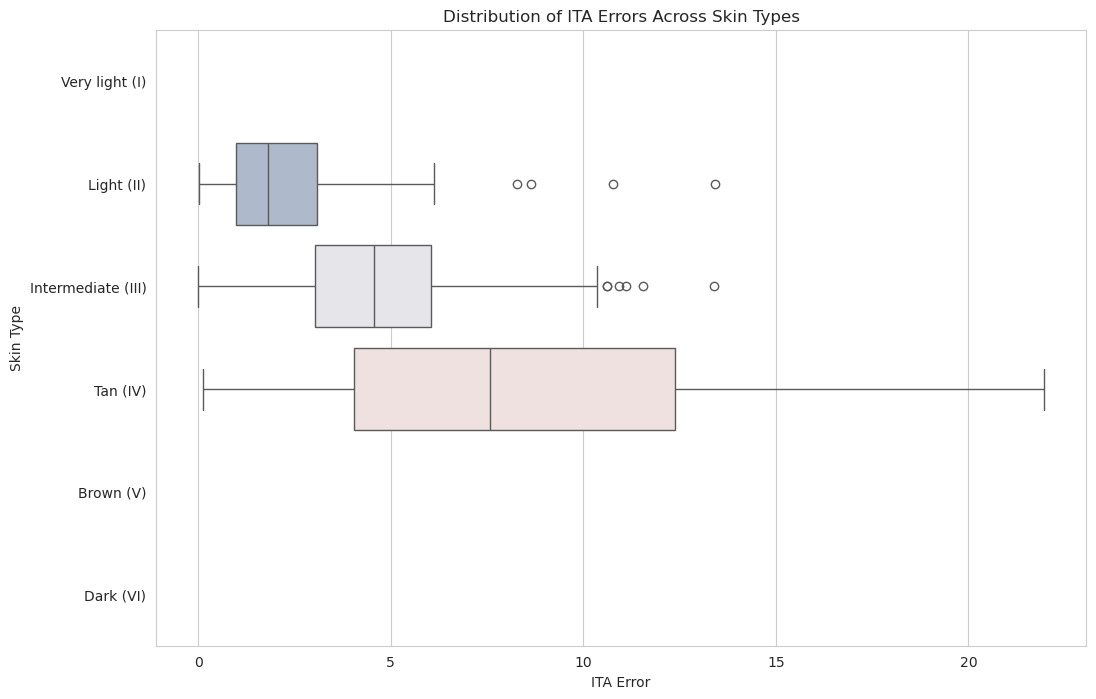

In [58]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure with a specified size
plt.figure(figsize=(12, 8))

# Plotting the distribution of ITA errors across different skin types
sns.boxplot(x='ita_error', y='skin_type', data=data, palette="vlag", order=["Very light (I)", "Light (II)", "Intermediate (III)", "Tan (IV)", "Brown (V)", "Dark (VI)"])

# Adding a title and labels for clarity
plt.title('Distribution of ITA Errors Across Skin Types')
plt.xlabel('ITA Error')
plt.ylabel('Skin Type')

# Display the plot
plt.show()

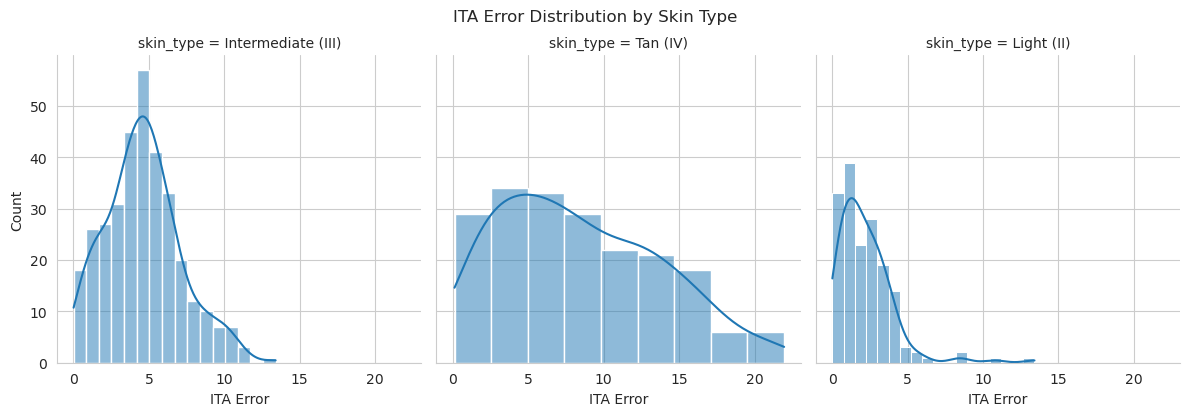

In [59]:
# Faceted plot of ITA errors for each skin type
g = sns.FacetGrid(data, col="skin_type", col_wrap=3, height=4)
g.map(sns.histplot, "ita_error", kde=True)

# Adding a title and adjusting axis labels
g.fig.suptitle('ITA Error Distribution by Skin Type', y=1.03)
g.set_axis_labels('ITA Error', 'Count')

plt.show()

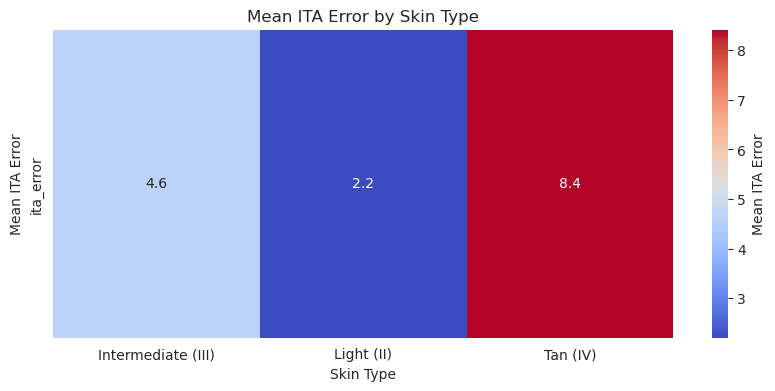

In [60]:
# Calculate the mean ITA error for each skin type
mean_error_by_skin_type = data.groupby('skin_type')['ita_error'].mean().reset_index()

# Create a simple dataframe suitable for a seaborn heatmap
# Note: We're transforming the data into a format that seaborn can use directly for a heatmap.
heatmap_data = mean_error_by_skin_type.set_index('skin_type').T

# Plotting the heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", cbar_kws={'label': 'Mean ITA Error'})
plt.title('Mean ITA Error by Skin Type')
plt.xlabel('Skin Type')
plt.ylabel('Mean ITA Error')
plt.show()

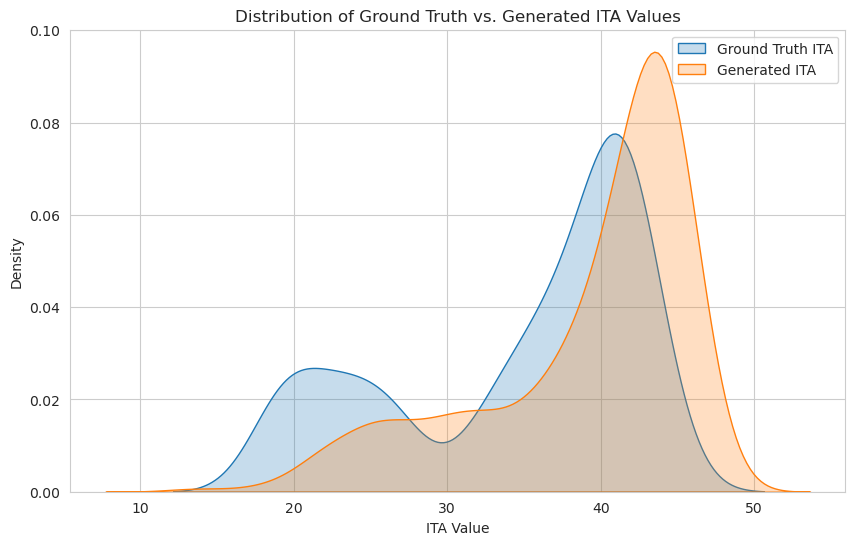

In [61]:
# Distribution of Ground Truth vs. Generated ITA Values
plt.figure(figsize=(10, 6))
sns.kdeplot(data['ita_gt'], label='Ground Truth ITA', fill=True)
sns.kdeplot(data['ita_gen'], label='Generated ITA', fill=True)
plt.legend()
plt.title('Distribution of Ground Truth vs. Generated ITA Values')
plt.xlabel('ITA Value')
plt.show()

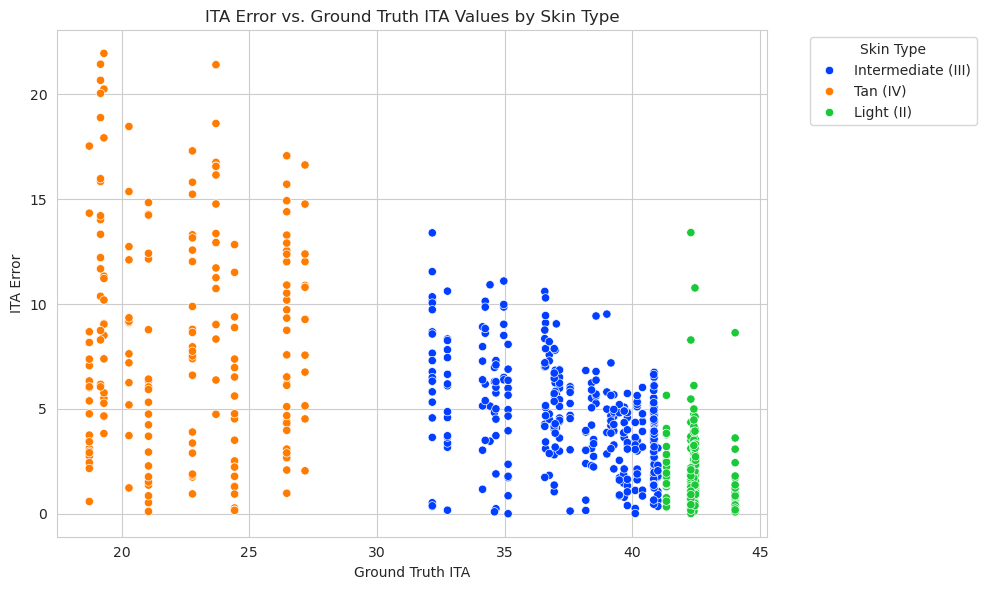

In [62]:
# Error Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ita_gt', y='ita_error', data=data, hue='skin_type', palette='bright')
plt.title('ITA Error vs. Ground Truth ITA Values by Skin Type')
plt.xlabel('Ground Truth ITA')
plt.ylabel('ITA Error')
plt.legend(title='Skin Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()